In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

we have to import the required libraries

In [46]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Read the csv file by using .read so that we will find the dataframe of the file.

In [47]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

we need to check the null values present in our data set, we do not have any null values in our dataset

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

As per df.info we can verify the data types prsent in our dataset, so there are objects, float64, & int64 present in our dataset.

In [49]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['Country', 'Region']


Numerical Columns:  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


Here we have classified the dataset in two type as categorical data and numerical data, here in this dataset there are two categorical columns which are Country and region rest ther components are numerical.

In [50]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


Number of unique values are verified

<AxesSubplot:>

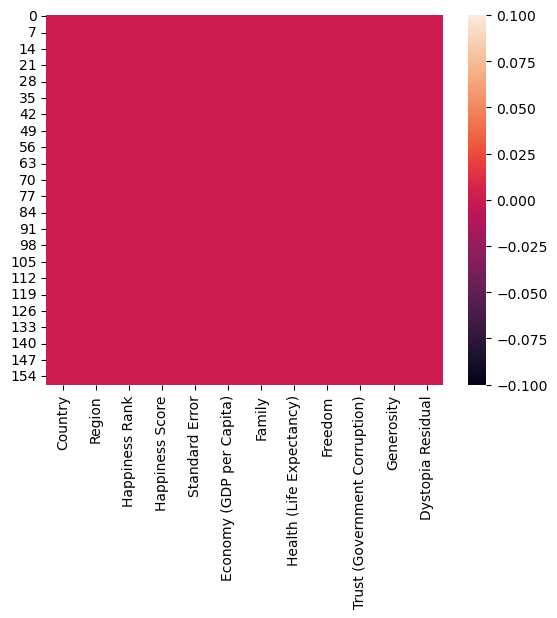

In [51]:
sns.heatmap(df.isnull())

Null values are represented by using heatmap plot.

In [52]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

By using df.skew we can verified the skewness in the dataset, here we can see the skewness in dataset over trust, Generosity and standard error.

In [53]:
df['Trust (Government Corruption)'] = np.cbrt(df['Trust (Government Corruption)'])

In [54]:
df['Generosity'] = np.cbrt(df['Generosity'])

Here we are trying to reduce the skewness from the dataset.

In [55]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

Skewness is reduced in the dataset now data is more clear and further we can proceed

In [56]:
df.drop(['Region'], axis=1, inplace=True)
df.drop(['Happiness Rank'], axis=1, inplace=True)


In [62]:
df.drop(['Country'], axis=1, inplace=True)


We will drop the unnecessary components in the dataset, therefore here we are dropping the region, happiness rank and country.

In [63]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.483089,0.596606,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.145875,0.122462,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.395095,0.531977,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.475071,0.600120,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.564887,0.676701,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.820269,0.926721,3.602140


Here we will describe our dataset and will check whether the unnecessary components are deleted or not.

In [64]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.748756,0.667029,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.521036,0.758453,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.784910,0.698903,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.714677,0.702704,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.690742,0.770886,2.45176


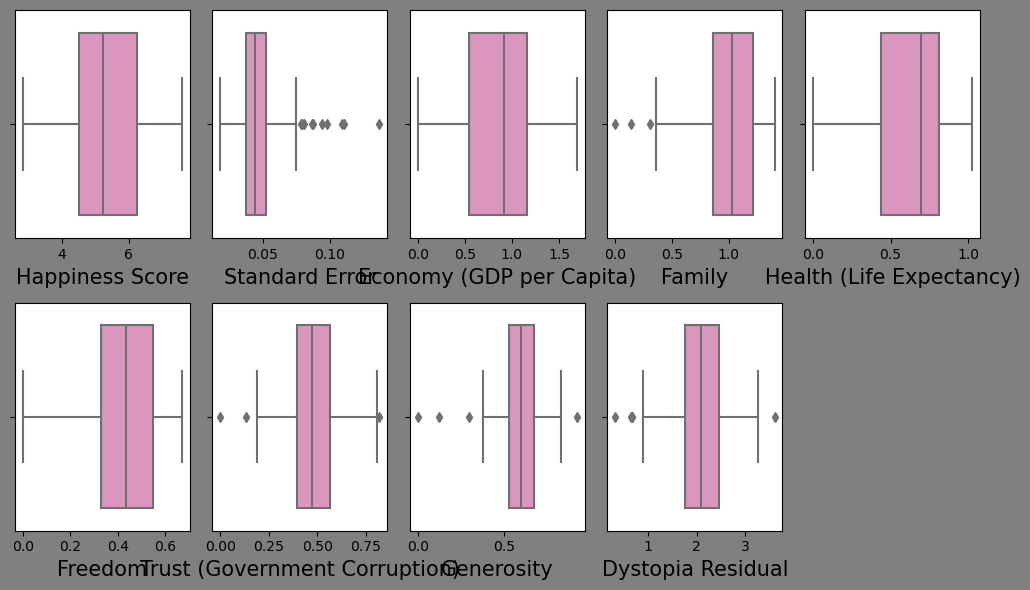

In [65]:
plt.figure(figsize=(10,6), facecolor= 'Grey')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

We are representing the dataset with the boxplot, here this boxplot shows the outliers in the data set.

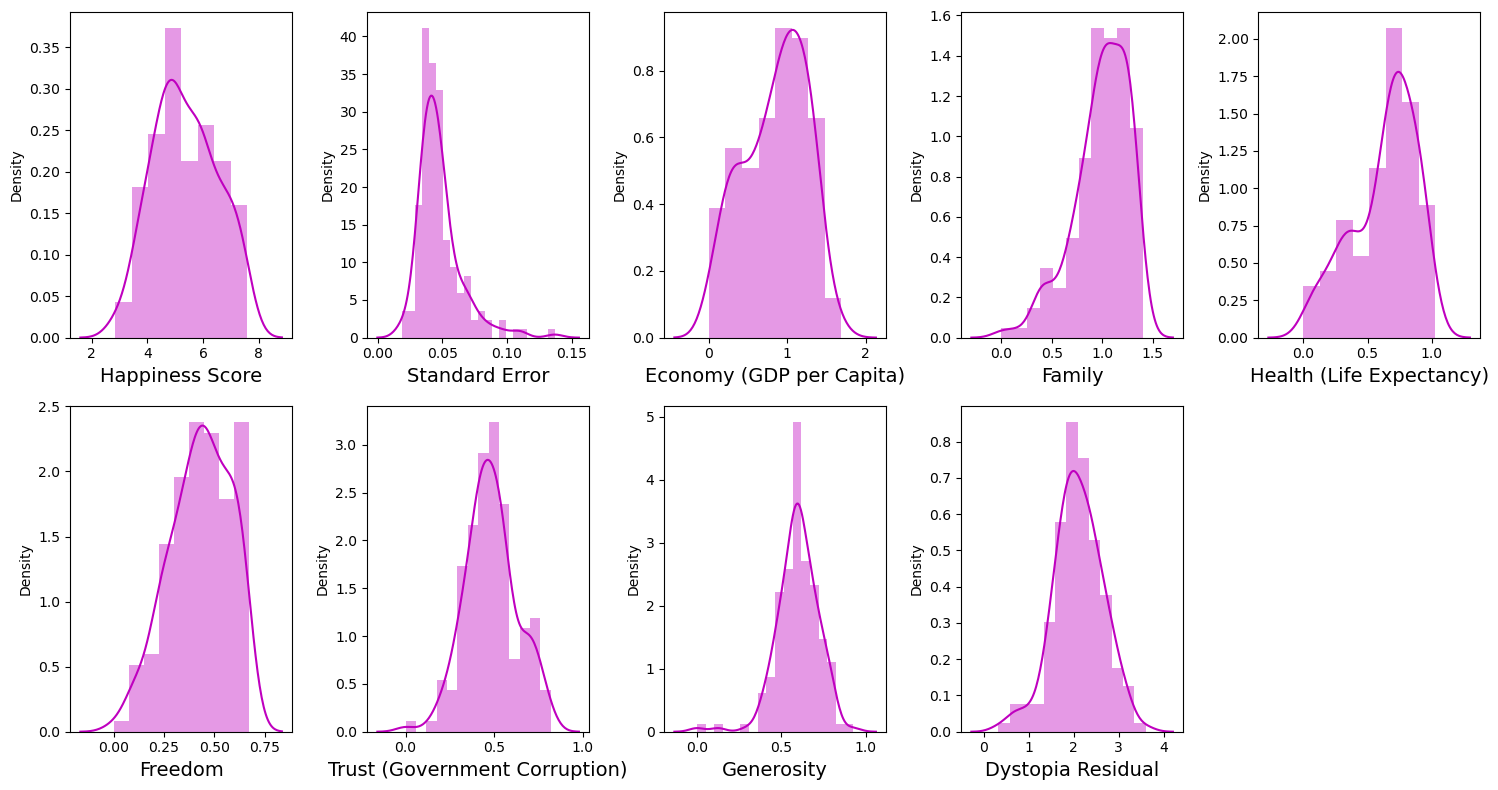

In [66]:
plt.figure(figsize=(15,8), facecolor= "white")
plotnumber=1
for col in df:
    if plotnumber<=12:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

By using distplot we can verify the skewness in the dataset with the help of grap which helps to identify it easily.

In [67]:
cor= df.corr()
cor

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.326229,0.159029,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.162549,-0.032307,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.205482,-0.059576,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.131653,0.066803,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.149556,0.044395,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.461105,0.398210,0.062783
Trust (Government Corruption),0.326229,-0.162549,0.205482,0.131653,0.149556,0.461105,1.000000,0.266991,0.010769
Generosity,0.159029,-0.032307,-0.059576,0.066803,0.044395,0.398210,0.266991,1.000000,-0.061511
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,0.010769,-0.061511,1.000000


We will check the correlation in the dataset

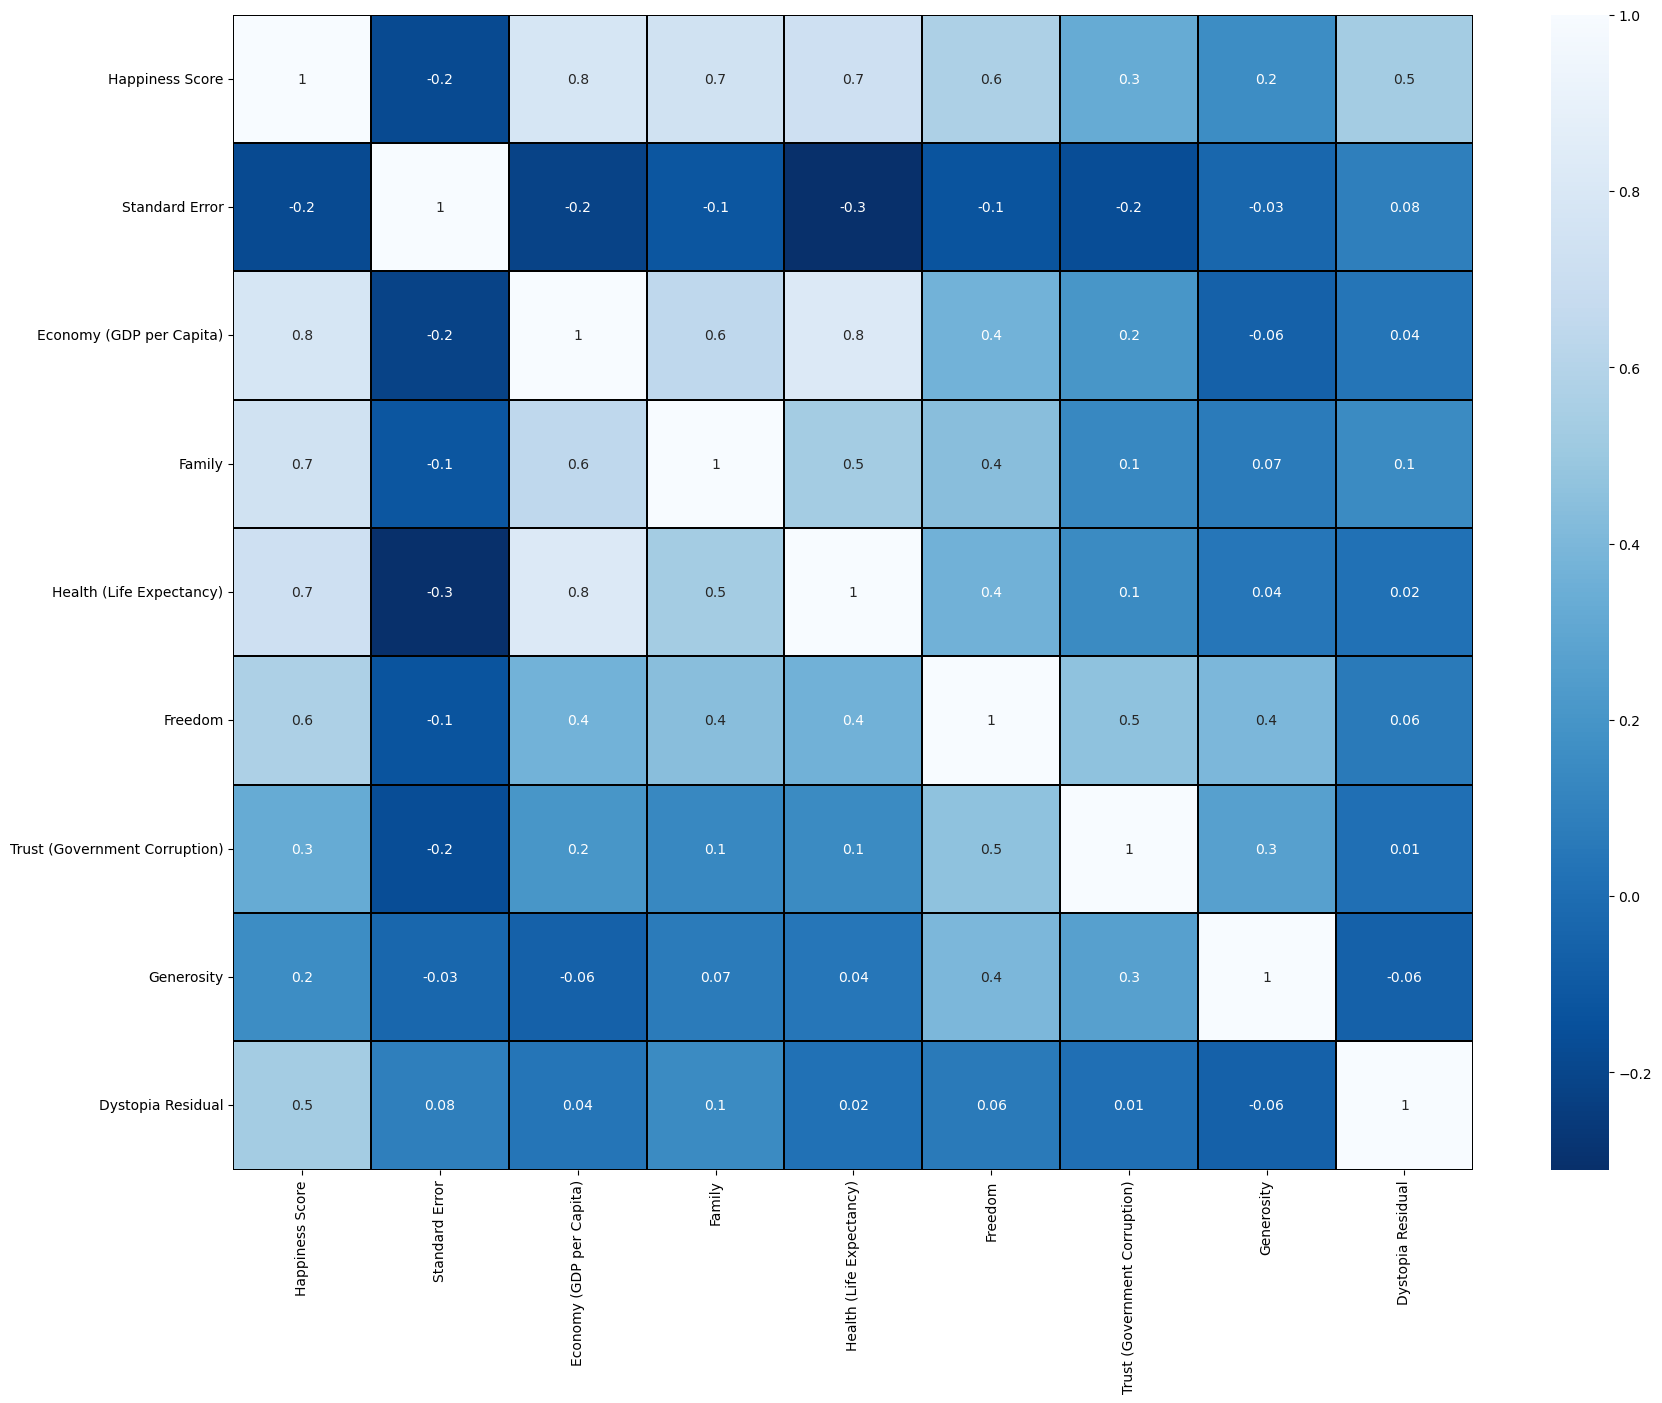

In [68]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()


With the help of the heatmap we can verify the correlation between the components, here we can see that the happiness score have more corelation with economy and family.

In [69]:
df.drop(['Family'], axis=1, inplace=True)


Here we can drop the family component as it has more corelation with the target variable.

In [70]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.630259,0.428615,0.483089,0.596606,2.098977
std,1.145010,0.017146,0.403121,0.247078,0.150693,0.145875,0.122462,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.439185,0.328330,0.395095,0.531977,1.759410
50%,5.232500,0.043940,0.910245,0.696705,0.435515,0.475071,0.600120,2.095415
75%,6.243750,0.052300,1.158448,0.811013,0.549092,0.564887,0.676701,2.462415
max,7.587000,0.136930,1.690420,1.025250,0.669730,0.820269,0.926721,3.602140


we will check the dataset again after deleting the family component.

In [71]:
x=df.drop("Happiness Score", axis=1)
y=df["Happiness Score"]

In this dataset target variable is happiness score which will reflect on y-axis therefore will show rest other components on x-axis

In [72]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Standard Error,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.805926,1.369621,1.263408,1.577438,1.826993,0.576890,0.758258
1,0.055889,1.135226,1.289434,1.332456,0.260958,1.325808,1.092857
2,-0.854487,1.192861,0.992229,1.469659,2.075620,0.837993,0.712335
3,-0.531526,1.525130,1.035145,1.605131,1.592625,0.869128,0.663893
4,-0.722845,1.194876,1.118054,1.360416,1.428028,1.427657,0.639337
...,...,...,...,...,...,...,...
153,-0.774917,-1.552987,-0.818610,1.087740,2.318782,0.104570,-2.588925
154,-0.662582,-1.392303,-1.263362,0.372033,-0.357762,-0.239847,-0.843967
155,0.132534,-0.455245,0.372199,-1.809238,0.624780,1.489900,-3.208430
156,2.263962,-2.067566,-1.649648,-2.064472,-0.123602,-0.118581,-0.481985


We will import the required liabraries 

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

We are using the linear regression model for the preduction of the dataset

In [77]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 0.047832759758389146
R-squared (R2) Score: 0.9662852954084606


Using the linear regression model for building the model to predict the target variable

In [78]:
import joblib
joblib.dump(model,"Happiness_score.pkl")

['Happiness_score.pkl']

Import the joblid for the target variable

In [80]:
model = joblib.load("Happiness_score.pkl")
prediction = model.predict(X_test)
prediction

array([4.05234681, 5.95053315, 4.37040535, 2.91993825, 4.54258286,
       6.47806161, 4.56989818, 4.97620455, 4.84001213, 3.51156613,
       7.03781299, 5.59704631, 6.86732368, 5.31353618, 6.80172751,
       6.51818922, 4.31426228, 5.16990606, 4.52149033, 5.83473756,
       3.69279409, 6.94411517, 7.2359597 , 7.16259464, 6.42976435,
       5.14888205, 5.75552284, 3.73824755, 4.49308582, 3.61743361,
       3.45185623, 5.40015682])

In [81]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,4.052347,4.307
1,5.950533,5.987
2,4.370405,4.194
3,2.919938,2.905
4,4.542583,5.057
5,6.478062,6.574
6,4.569898,4.898
7,4.976205,4.876
8,4.840012,4.949
9,3.511566,3.931


Finally we have predicted the target variable. Here we have predicted the happiness score in the country. Predicted and original happiness score is nearly same therefore we can say that our prediction is nearly correct.